In [55]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmocean.cm as cm
import datetime as dt
import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm
import pickle
import os
from salishsea_tools import viz_tools, geo_tools
import arrow
import copy
import math
import matplotlib.dates as mdates

In [56]:
mycmap = copy.copy(cm.oxy)
mycmap.set_bad('darkgreen')

In [57]:

lonSI1 = -123.58
lonSI2 = -123.44
latSI1 = 48.5
latSI2 = 48.695

In [58]:
# dataframe 
df_chemold = xr.open_dataset('/data/atall/MEOPAR/SalishSeaCast/results/daily/SalishSea_1d_201809_chem_T.nc')
df_chemnewox = xr.open_dataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/SalishSea_1d_20180901_20181130_chem_T.nc')
df_diagnew = xr.open_dataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/SalishSea_1d_20180901_20181130_diag_T.nc')
df_chemnewox2 = xr.open_dataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/01_10sep18/SalishSea_1d_20180901_20180910_chem_T.nc')
df_diagnew2 = xr.open_dataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/01_10sep18/SalishSea_1d_20180901_20180910_diag_T.nc')

df_chemoldb = xr.open_dataset('/data/atall/MEOPAR/SalishSeaCast/results/daily/SalishSea_1d_201801_chem_T.nc')
df_chemnewoxb = xr.open_dataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/2018/jan_dec18/SalishSea_1d_20180101_20181231_chem_T.nc')
df_diagnewb = xr.open_dataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/2018/jan_dec18/SalishSea_1d_20180101_20181231_diag_T.nc')

In [59]:
# Constant and data rang
kk, jj, ii = 27, 353, 209 # Patricia bay 
syear = 2018
eyear = 2018
smonth = 9
emonth = 9
startdate = arrow.get(syear, smonth, 1)
enddate = arrow.get(eyear, emonth, 10)
print (startdate, enddate, jj, ii)

smonth2 = 1
emonth2 = 1
startdate2 = arrow.get(syear, smonth2, 1)
enddate2 = arrow.get(eyear, emonth2, 31)

2018-09-01T00:00:00+00:00 2018-09-10T00:00:00+00:00 353 209


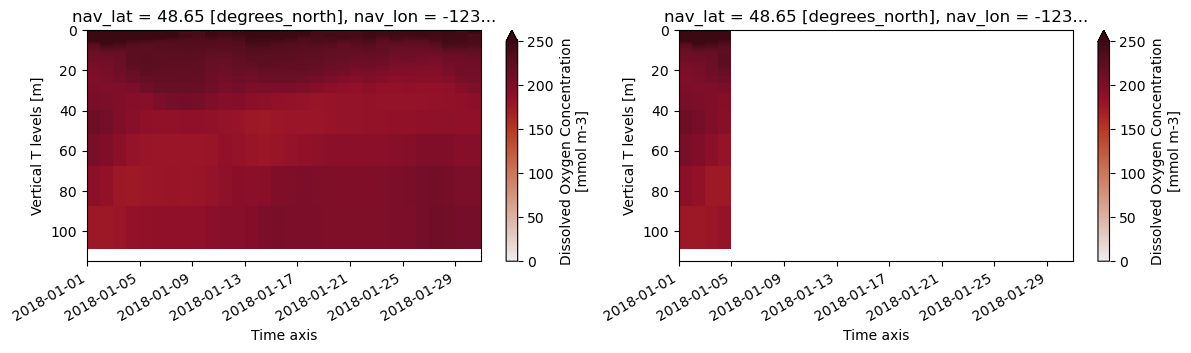

In [60]:
fig, ax = plt.subplots(1, 2, figsize = (14, 3)) 
df_chemoldb.dissolved_oxygen[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=250, ylim=(115, 0), xlim=(startdate2, enddate2));
df_chemnewoxb.dissolved_oxygen[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=250, ylim=(115, 0), xlim=(startdate2, enddate2));

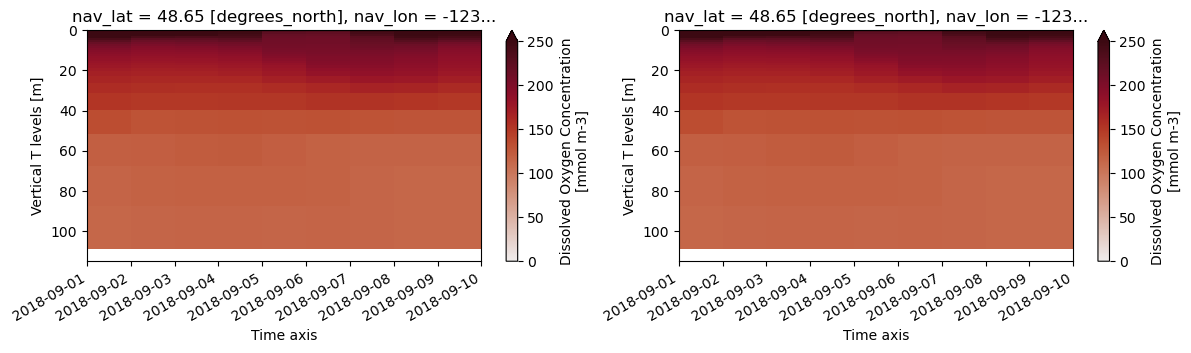

In [61]:
fig, ax = plt.subplots(1, 2, figsize = (14, 3)) 
df_chemnewox.dissolved_oxygen[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=250, ylim=(115, 0), xlim=(startdate, enddate));
df_chemnewox2.dissolved_oxygen[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=250, ylim=(115, 0), xlim=(startdate, enddate));

In [62]:
df_diagnew2

<xarray.Dataset>
Dimensions:                (y_grid_T: 898, x_grid_T: 398, nvertex_grid_T: 4,
                            deptht: 40, axis_nbounds: 2, y_grid_W: 898,
                            x_grid_W: 398, nvertex_grid_W: 4, depthw: 40,
                            time_counter: 10)
Coordinates:
    nav_lat_grid_T         (y_grid_T, x_grid_T) float32 ...
    nav_lon_grid_T         (y_grid_T, x_grid_T) float32 ...
  * deptht                 (deptht) float32 0.5 1.5 2.5 ... 387.6 414.5 441.5
    nav_lat_grid_W         (y_grid_W, x_grid_W) float32 ...
    nav_lon_grid_W         (y_grid_W, x_grid_W) float32 ...
  * depthw                 (depthw) float32 0.0 1.0 2.0 ... 374.1 401.1 428.0
    time_centered          (time_counter) datetime64[ns] ...
  * time_counter           (time_counter) datetime64[ns] 2018-09-01T12:00:00 ...
Dimensions without coordinates: y_grid_T, x_grid_T, nvertex_grid_T,
                                axis_nbounds, y_grid_W, x_grid_W, nvertex_grid_W
Data variables: (12/24)
    bounds_nav_lon_grid_T  (y_grid_T, x_grid_T, nvertex_grid_T) float32 ...
    bounds_nav_lat_grid_T  (y_grid_T, x_grid_T, nvertex_grid_T) float32 ...
    area_grid_T            (y_grid_T, x_grid_T) float32 ...
    deptht_bounds          (deptht, axis_nbounds) float32 ...
    bounds_nav_lon_grid_W  (y_grid_W, x_grid_W, nvertex_grid_W) float32 ...
    bounds_nav_lat_grid_W  (y_grid_W, x_grid_W, nvertex_grid_W) float32 ...
    ...                     ...
    NPP                    (time_counter, deptht, y_grid_T, x_grid_T) float32 ...
    RPP                    (time_counter, deptht, y_grid_T, x_grid_T) float32 ...
    NITR                   (time_counter, deptht, y_grid_T, x_grid_T) float32 ...
    RMIN                   (time_counter, deptht, y_grid_T, x_grid_T) float32 ...
    RMIC                   (time_counter, deptht, y_grid_T, x_grid_T) float32 ...
    RMES                   (time_counter, deptht, y_grid_T, x_grid_T) float32 ...
Attributes:
    name:         SalishSea_1d_20180901_20180910_diag_T
    description:  diagnostic terms of DO
    title:        diagnostic terms of DO
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-01 04:19:48 GMT
    uuid:         d38ab202-f83c-4016-8b5b-4cf6a5aa7282

In [63]:
sinks_o2 = (df_diagnew2.NITR + df_diagnew2.RMIN + df_diagnew2.RMIC + df_diagnew2.RMES) #* 86400
#sinks_o2 = (df_diagnew2.RMIN + df_diagnew2.RMIC + df_diagnew2.RMES) #* 86400
sourc_o2 = (df_diagnew2.NPP + df_diagnew2.RPP) #* 86400
sms_o2 = sinks_o2 + sourc_o2

Text(0.5, 1.0, 'Resp/Z1')

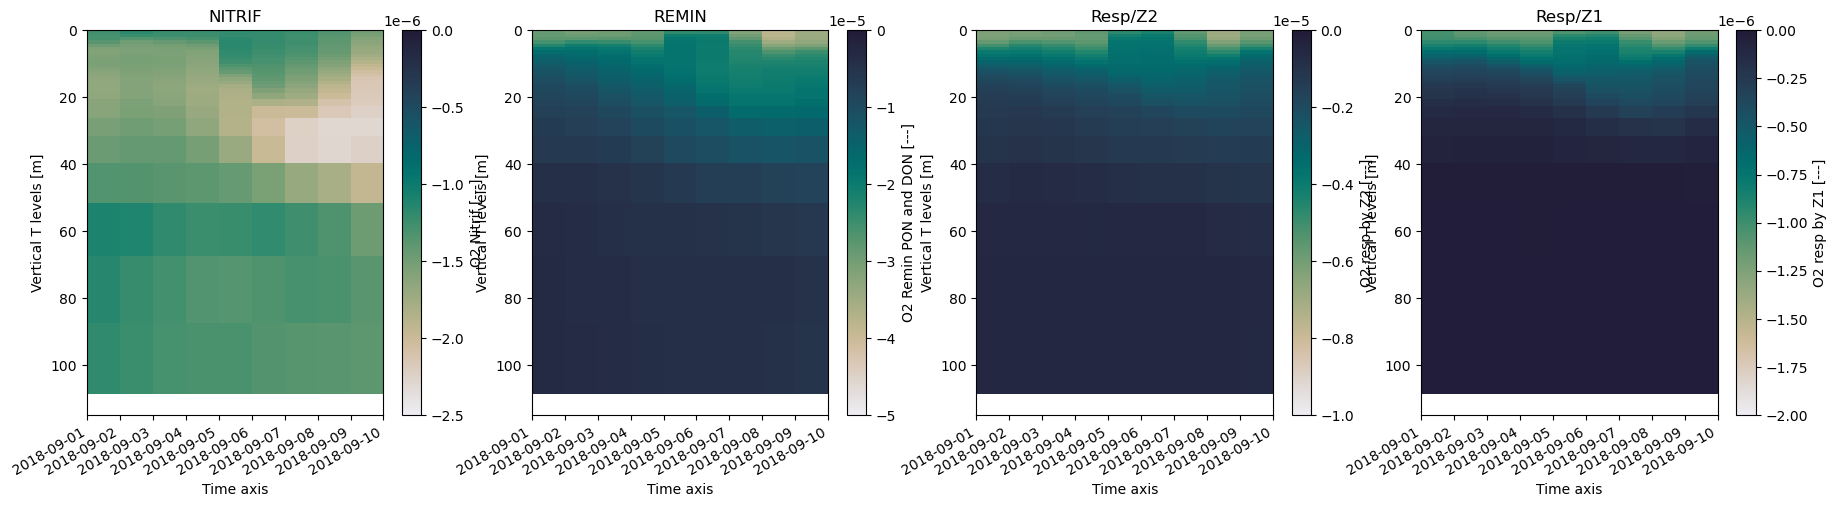

In [64]:
fig, ax = plt.subplots(1, 4, figsize = (22, 5)) 
df_diagnew2.NITR[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.rain, vmin=-0.0000025, vmax=0, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew2.RMIN[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.rain, vmin=-0.00005, vmax=0, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew2.RMES[:,:kk,jj,ii].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.rain, vmin=-0.00001, vmax=0, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew2.RMIC[:,:kk,jj,ii].plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.rain, vmin=-0.000002, vmax=0, ylim=(115, 0), xlim=(startdate, enddate));

ax[0].set_title('NITRIF')
ax[1].set_title('REMIN')
ax[2].set_title('Resp/Z2')
ax[3].set_title('Resp/Z1')


Text(0.5, 1.0, 'RegPP')

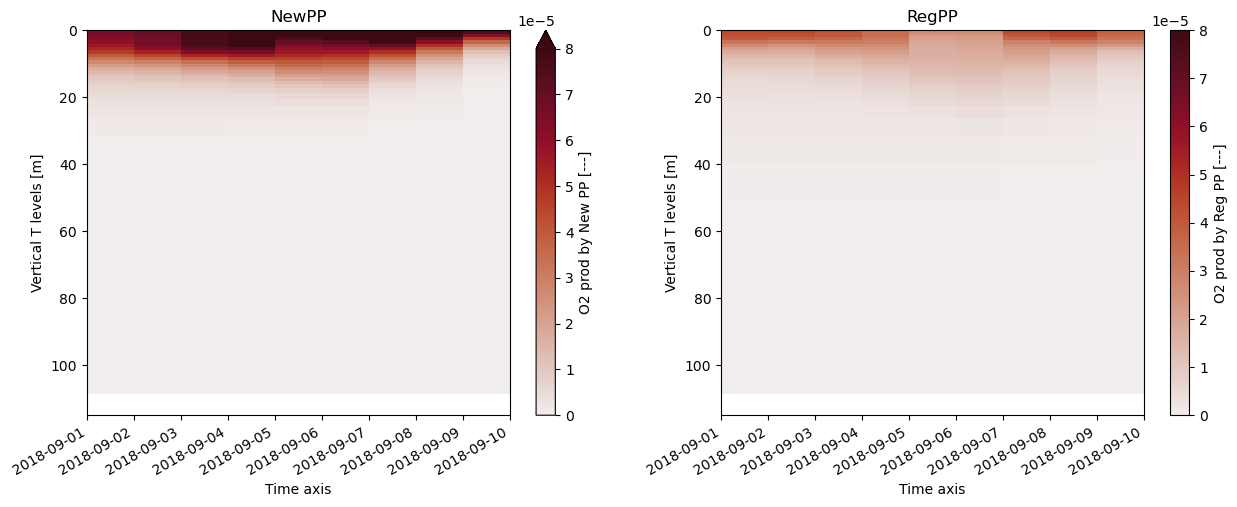

In [65]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5)) 
df_diagnew2.NPP[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=0.00008, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew2.RPP[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=0.00008, ylim=(115, 0), xlim=(startdate, enddate));

ax[0].set_title('NewPP')
ax[1].set_title('RegPP')

Text(0.5, 1.0, 'SMS')

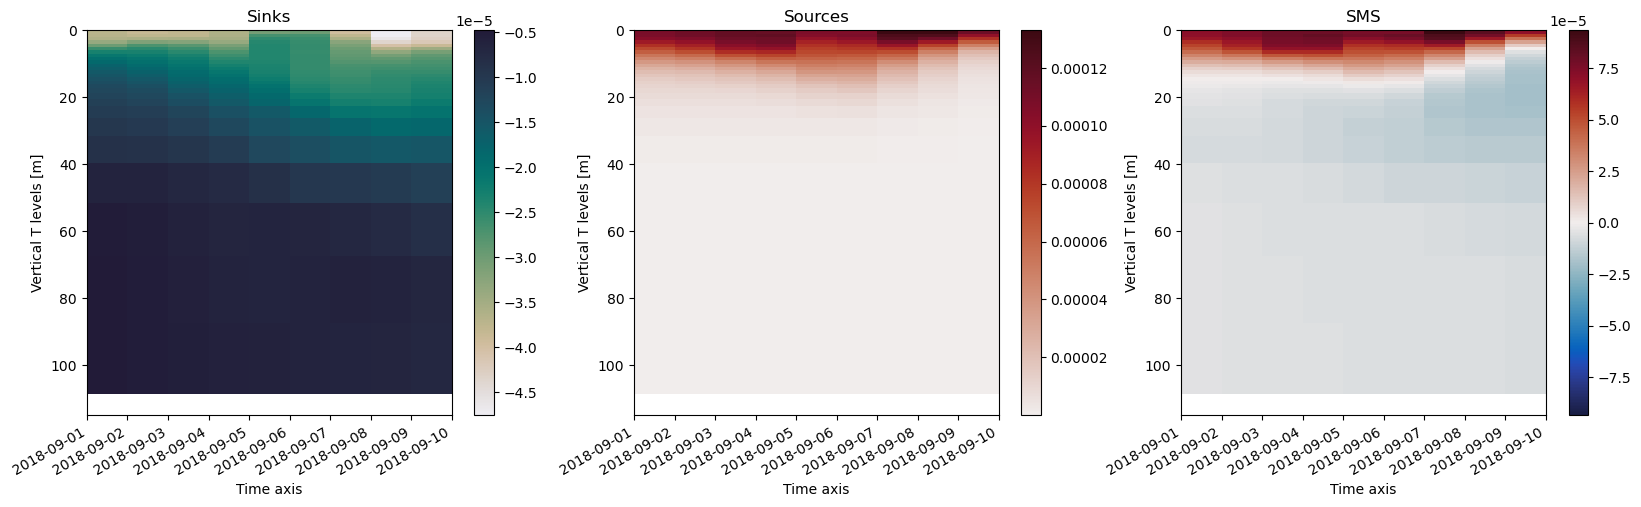

In [66]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5)) 
sinks_o2[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.rain, ylim=(115, 0), xlim=(startdate, enddate));
sourc_o2[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp, ylim=(115, 0), xlim=(startdate, enddate));
sms_o2[:,:kk,jj,ii].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));

ax[0].set_title('Sinks')
ax[1].set_title('Sources')
ax[2].set_title('SMS')

In [67]:
TVDH = df_diagnew2.TVDXb + df_diagnew2.TVDYb
TVDT = TVDH + df_diagnew2.TVDZb
LDFH = df_diagnew2.ULDF + df_diagnew2.VLDF
#LDFT = LDFH + df_diagnew2.WLDF
VMIXT = df_diagnew2.VMIX + df_diagnew2.VMIXH

Text(0.5, 1.0, 'TVDZ')

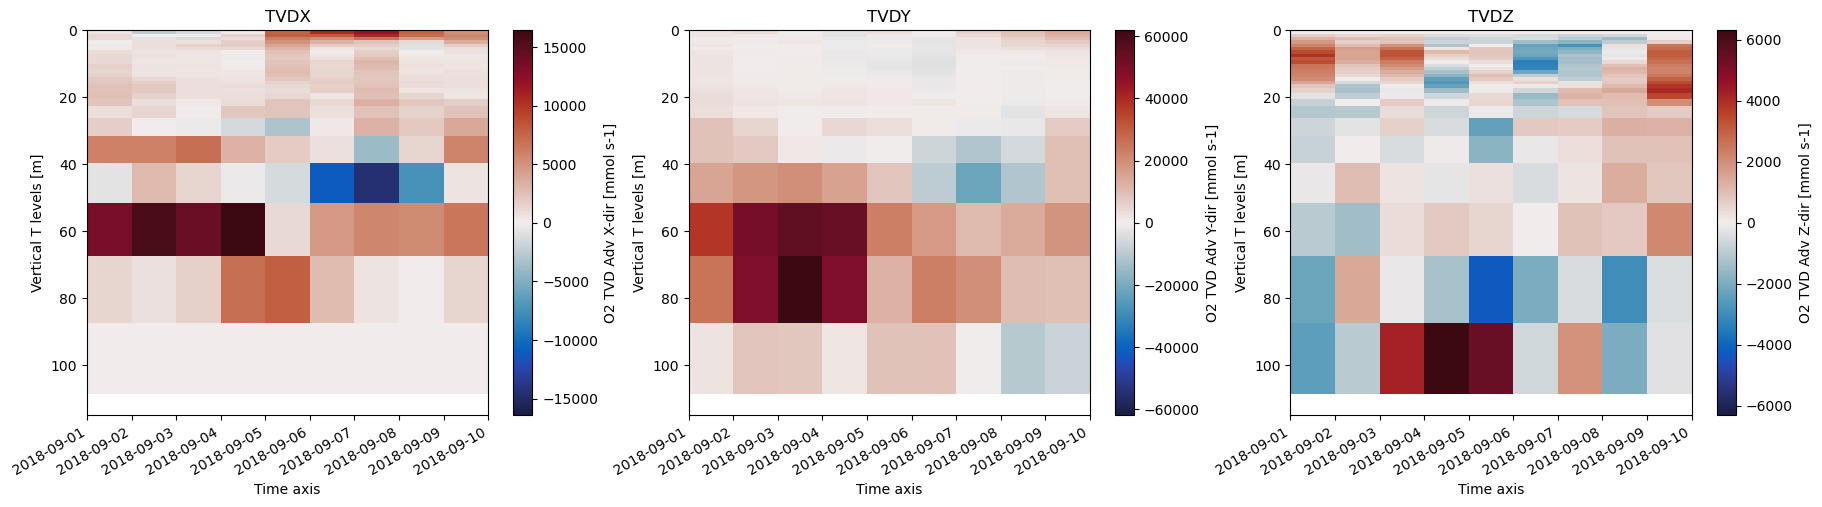

In [68]:
fig, ax = plt.subplots(1, 3, figsize = (22, 5)) 
df_diagnew2.TVDXb[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew2.TVDYb[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew2.TVDZb[:,:kk,jj,ii].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));
#TVDH[:,:kk,jj,ii].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));
#TVDT[:,:kk,jj,ii].plot(ax=ax[4], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));


ax[0].set_title('TVDX')
ax[1].set_title('TVDY')
ax[2].set_title('TVDZ')
#ax[2].set_title('TVDX + TVDY')
#ax[4].set_title('TVDX+ TVDY + TVDZ')


Text(0.5, 1.0, 'VMIXH')

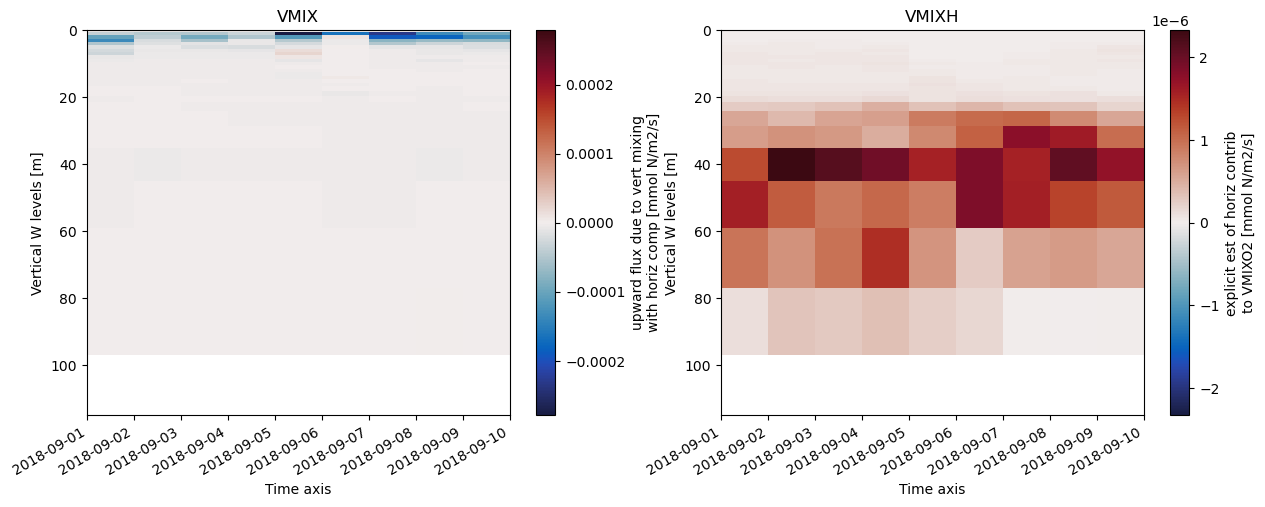

In [69]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5)) 
df_diagnew2.VMIX[:,:kk,jj,ii].plot(ax=ax[0], y="depthw", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew2.VMIXH[:,:kk,jj,ii].plot(ax=ax[1], y="depthw", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));
#VMIXT[:,:kk,jj,ii].plot(ax=ax[2], y="depthw", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));

ax[0].set_title('VMIX')
ax[1].set_title('VMIXH')
#ax[2].set_title('VMIX + VMIXH')

Text(0.5, 1.0, 'WLDF')

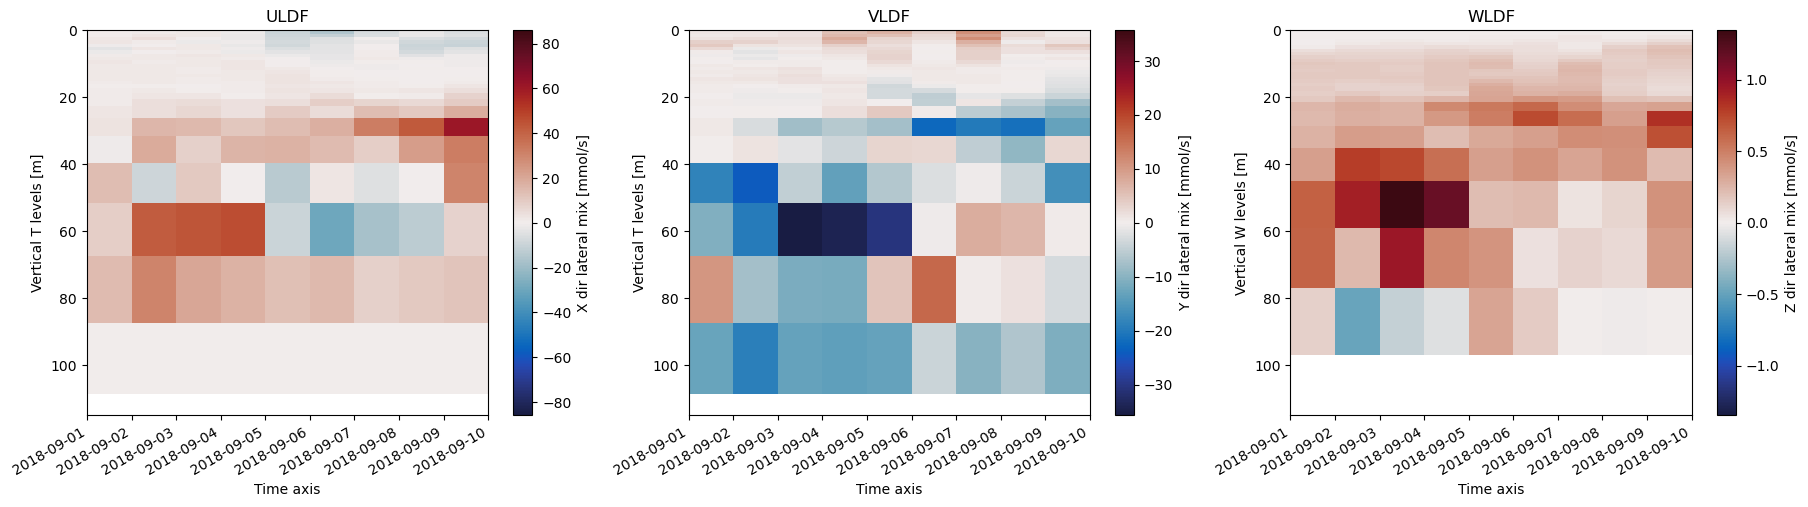

In [70]:
fig, ax = plt.subplots(1, 3, figsize = (22, 5)) 
df_diagnew2.ULDF[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew2.VLDF[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew2.WLDF[:,:kk,jj,ii].plot(ax=ax[2], y="depthw", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));
#LDFH[:,:kk,jj,ii].plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));
#LDFT[:,:kk,jj,ii].plot(ax=ax[4], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));

ax[0].set_title('ULDF')
ax[1].set_title('VLDF')
ax[2].set_title('WLDF')
#ax[3].set_title('LDFX + LDFY')
#ax[4].set_title('LDFX+ LDFY + LDFZ')

Text(0.5, 1.0, 'MIXING')

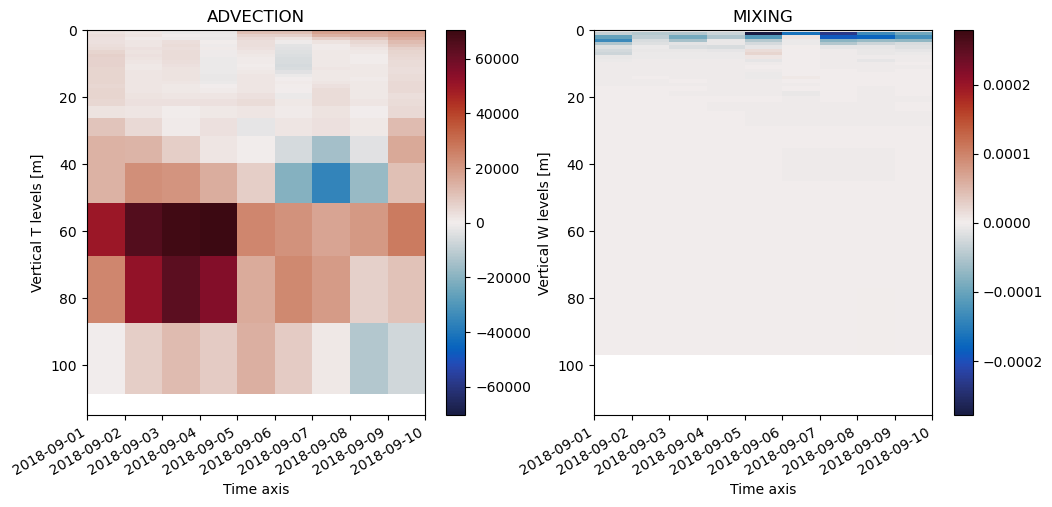

In [71]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5)) 
TVDT[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));
#LDFT[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));
VMIXT[:,:kk,jj,ii].plot(ax=ax[1], y="depthw", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));
ax[0].set_title('ADVECTION')
ax[1].set_title('MIXING')
